# 길이가 긴 니크롬선의 전압과 전류 사이의 관계를 학습합니다.

## 데이터 준비

In [119]:
import pandas as pd
import numpy as np
filepath = './dataset/short_line.csv'
short_df = pd.read_csv(filepath)

short_Voltage = np.array(short_df['Voltage'])
short_Ampare = np.array([0.04, 0.08, 0.11, 0.15])

In [120]:
short_train_input = short_Voltage.reshape(-1, 1)
short_train_target = short_Ampare

### 실험한 데이터 시각화하기

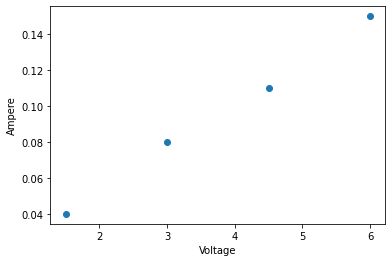

In [121]:
import matplotlib.pyplot as plt

plt.scatter(short_Voltage, short_Ampare)
plt.xlabel('Voltage')
plt.ylabel('Ampere')
plt.show()

실험해본 데이터를 시각화해 보았을때 데이터가 매우 선형적인 것을 확인해 보실수가 있습니다.
이제 우리는 이 데이터들을 학습시킨후 시각화를 해 보아서 전압과 전류 사이에 관계를
분석해 보도록 하겠습니다.

## 긴 니크롬선의 전압과 전류 사이의 관계를 나타내는 직선을 학습하기

#### 데이터 분석
위 산점도는 매우 선형적인 모양이므로 우리는 위 데이터를 1차함수를 활용하여 학습하도록 하겠습니다.


In [122]:
from sklearn.linear_model import LinearRegression

short_lr = LinearRegression()

short_lr.fit(short_train_input, short_train_target)

LinearRegression()

### 학습한 직선 그래프로 나타내기

In [123]:
print(short_lr.coef_, short_lr.intercept_)

[0.024] 0.005000000000000018


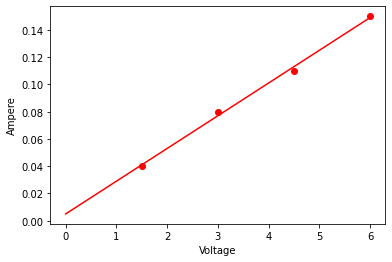

In [124]:
plt.scatter(short_Voltage, short_Ampare, color='red')
plt.plot([0, 6], [0*short_lr.coef_ + short_lr.intercept_, 6*short_lr.coef_+short_lr.intercept_], 'r')
plt.xlabel('Voltage')
plt.ylabel('Ampere')
plt.show()

성공적으로 길이가 긴 니크롬선의 전류를 흘려 보냈을때 전압과 전류 사이의 관계를 학습했습니다.

위에 직선을 보았을때 위 직선은 일차함수의 그래프 이므로 전압과 전류의 세기는 비례한다라는걸
증명할수 있습니다.

# 길이가 짧은 니크롬선의 전압과 전류 사이의 관계를 학습합니다.


## 데이터 준비

In [125]:
filepath = './dataset/long_line.csv'
long_df = pd.read_csv(filepath)

long_Voltage = np.array(short_df['Voltage'])
long_Ampare = np.array([0.08, 0.15, 0.22, 0.30])

long_train_input = long_Voltage.reshape(-1, 1)
long_train_target = long_Ampare

### 실험한 데이터 시각화하기

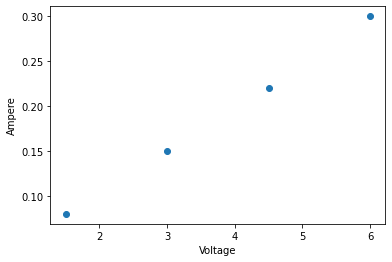

In [126]:
plt.scatter(long_train_input, long_train_target)
plt.xlabel('Voltage')
plt.ylabel('Ampere')
plt.show()

마찬가지로 이 산점도도 매우 선형적인 그래프를 가지고 있으므로 일차함수를 사용하여
모델을 학습하도록 하겠습니다.

## 모델 학습하기

In [127]:
long_lr = LinearRegression()
long_lr.fit(long_train_input, long_train_target)


LinearRegression()

### 학습한 직선 시각화하기

In [128]:
print(long_lr.coef_, long_lr.intercept_)

[0.04866667] 0.0050000000000000044


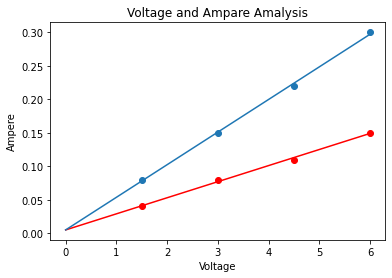

In [129]:
plt.title('Voltage and Ampare Amalysis')
plt.scatter(short_Voltage, short_Ampare, color='red')
plt.scatter(long_Voltage, long_Ampare)
plt.plot([0, 6], [0*short_lr.coef_ + short_lr.intercept_, 6*short_lr.coef_+short_lr.intercept_], 'r')
plt.plot([0, 6], [0*long_lr.coef_ + long_lr.intercept_, 6*long_lr.coef_+long_lr.intercept_])
plt.xlabel('Voltage')
plt.ylabel('Ampere')
plt.show()

위 그래프로 우리가 알수있는것은 전기 회로에서 전압과 전류는 비례한다. 이때 전압이 일정하면
니크롬선의 길이와 전류의 세기는 반비례한다. 라는것을 알수 있습니다.

# 옴의 법칙

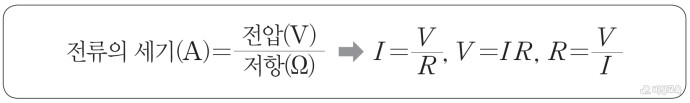

위 함수를 활용하여